In [1]:
%load_ext autoreload
%autoreload 2

from implemention.utils.load import *
import keras

X_train, y_train, X_val, y_val = load_train_data()

num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

print("data: ", X_train.shape)
print("label: ", y_train.shape)

Using TensorFlow backend.


data:  (24000, 1, 48, 48)
label:  (24000, 7)


In [2]:
X_pre, y_pre = X_train[:30], y_train[:30]

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

def get_model():
    
    model = Sequential()
    # 1, 48, 48
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(1, 48, 48),
                     data_format='channels_first', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=1e-5))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first')) #24
    
    # 32, 24, 24
    model.add(Conv2D(32, (3, 3), padding='same', data_format='channels_first', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=1e-5))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first')) #12
    
    # 32, 12, 12
    model.add(Conv2D(32, (3, 3), padding='same', data_format='channels_first', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=1e-5))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first')) #6
    # 32, 6, 6
    model.add(Flatten())
    # 32 * 6 * 6
    model.add(Dense(500))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=1e-5))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(300))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=1e-5))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

Epoch 1/20
30/30 [==============================] - 7s 241ms/step - loss: 2.6129 - acc: 0.1333
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 2.4576 - acc: 0.2000
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 2.1687 - acc: 0.2333
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 1.3892 - acc: 0.4667
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.9435 - acc: 0.7333
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.7981 - acc: 0.7667
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.8649 - acc: 0.7333
Epoch 8/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5109 - acc: 0.9000
Epoch 9/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4852 - acc: 0.9333
Epoch 10/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5694 - acc: 0.8667
Epoch 11/20
30/30 [==============================] - 0s 7ms/step - 

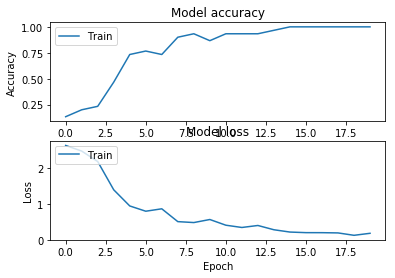

In [13]:
# pretrain test
import matplotlib.pylab as plt

model = get_model()
optim = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_pre, y_pre, batch_size=200, epochs=20, shuffle=True)

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 24000 samples, validate on 4709 samples
Epoch 1/20
24000/24000 [==============================] - 160s 7ms/step - loss: 1.9322 - acc: 0.3187 - val_loss: 1.5752 - val_acc: 0.4154
Epoch 2/20
24000/24000 [==============================] - 119s 5ms/step - loss: 1.5516 - acc: 0.4300 - val_loss: 1.6512 - val_acc: 0.3710
Epoch 3/20
24000/24000 [==============================] - 119s 5ms/step - loss: 1.3888 - acc: 0.4847 - val_loss: 1.4606 - val_acc: 0.4578
Epoch 4/20
24000/24000 [==============================] - 119s 5ms/step - loss: 1.2920 - acc: 0.5299 - val_loss: 1.4109 - val_acc: 0.4767
Epoch 5/20
24000/24000 [==============================] - 121s 5ms/step - loss: 1.2234 - acc: 0.5599 - val_loss: 1.3831 - val_acc: 0.4750
Epoch 6/20
24000/24000 [==============================] - 124s 5ms/step - loss: 1.1680 - acc: 0.5785 - val_loss: 1.3144 - val_acc: 0.5169
Epoch 7/20
24000/24000 [==============================] - 123s 5ms/step - loss: 1.1110 - acc: 0.6024 - val_loss: 1.3921 - v

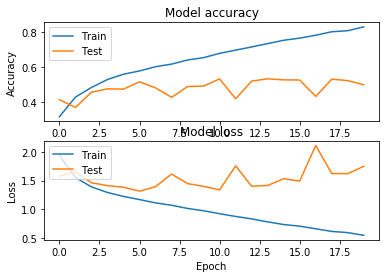

In [14]:
model = get_model()
optim = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, validation_data=(X_val, y_val), epochs=20, shuffle=True)

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
import pandas as pd

test_set = load_test_data()
res = model.predict(test_set, verbose=1)
pred = np.argmax(res, axis=1)

d1 = np.arange(pred.shape[0]).reshape(-1,1)
d2 = pred.reshape(-1,1)
d = np.hstack((d1, d2))
df = pd.DataFrame(d, columns=['id', 'label'])
df.to_csv(r'submission.csv', index=False)

7178/7178 [==============================] - 24s 3ms/step


In [ ]:
"""
[conv->batchnorm->relu->conv->batchnorm->relu->2*2maxpool]*3->[affine->batchnorm->relu->dropout]*2->affine->softmax
Test accuracy: 0.4835421533265876

Test accuracy: 0.5185814397992995

"""